# Training Kalman Filter for Results - 6 Feb

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from meteo_imp.kalman.fastai import *
from meteo_imp.kalman.filter import *
from meteo_imp.utils import *
from meteo_imp.data import *
from meteo_imp.gaussian import *

from fastai.tabular.learner import *
from fastai.learner import *
from fastai.callback.all import *
from fastcore.foundation import L
from fastcore.foundation import patch
from pathlib import Path, PosixPath

from meteo_imp.kalman.fastai import show_results
import pandas as pd
import numpy as np
import torch
import random
from pyprojroot import here

from sklearn.decomposition import PCA

In [ ]:
reset_seed()

In [ ]:
haiB = pd.read_parquet(hai_big_path)
hai_eraB = pd.read_parquet(hai_era_big_path)

In [ ]:
list(haiB.columns)

['TA', 'SW_IN', 'VPD', 'PA', 'P', 'WS', 'LW_IN']

In [ ]:
base = here("analysis/results/trained_8feb")

/home/simone/anaconda3/envs/data-science/lib/python3.10/site-packages/pyprojroot/pyprojroot.py:51: UserWarning: Path doesn't exist: /home/simone/Documents/uni/Thesis/GPFA_imputation/analysis/results/trained_8feb
  warnings.warn("Path doesn't exist: {}".format(path))


In [ ]:
base.mkdir(exist_ok=True)

In [ ]:
@patch
def add_end(self: PosixPath, end): return self.parent / (self.name + end)

In [ ]:
def train_or_load(model, dls, lr, n, path, keep=True):
    save_models = SaveModelsBatch(times_epoch=5)
    learn = Learner(dls, model, KalmanLoss(only_gap=True), cbs = [Float64Callback, save_models], metrics=rmse_gap) 
    items = random.choices(dls.valid.items, k=4) 
    if path.add_end(".pickle").exists() and keep:
        learn.model = torch.load(path.add_end(".pickle"))
        save_models = torch.load(path.add_end("_save_models.pickle"))
        # learn = torch.load(path.add_end("_learn.pickle"))
    else:
        learn.fit(lr, n)
        
        torch.save(learn.model, path.add_end(".pickle"))
        torch.save(save_models, path.add_end("_save_models.pickle"))
        # torch.save(learn, path.add_end("_learn.pickle"))
        learn.recorder.plot_loss()
    return learn, save_models, items                           

## All variables - 12 varying 

Model Av (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_Av = imp_dataloader(haiB, hai_eraB, var_sel = gen_var_sel(list(haiB.columns)), block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model_Av = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns), df_pca = haiB, pred_only_gap=True, use_conditional=False)

epoch,train_loss,valid_loss,rmse_gap,time
0,-5.528869,-4.755432,0.315470,25:56
1,-8.360162,-9.218511,0.282865,25:32


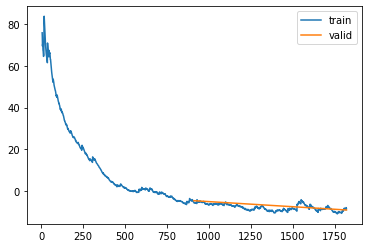

In [ ]:
learn_Av, save_models_Av, items_Av = train_or_load(model_Av, dls_Av, 2, 1e-3, base / "All_gap_varying_12_v1.pickle")

In [ ]:
show_results(learn_Av, items=items_Av, control_map=control_map)

/home/simone/anaconda3/envs/data-science/lib/python3.10/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (__class__) that exists in the learner. Use `self.learn.__class__` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


[MeteoImpItem(i=2258, shift=-10, var_sel=['TA', 'PA', 'VPD', 'LW_IN'], gap_len=12), MeteoImpItem(i=1912, shift=-50, var_sel=['VPD', 'SW_IN', 'TA', 'PA', 'LW_IN', 'P'], gap_len=12), MeteoImpItem(i=1852, shift=-20, var_sel=['TA', 'SW_IN', 'P', 'WS', 'PA', 'VPD'], gap_len=12), MeteoImpItem(i=2197, shift=40, var_sel=['LW_IN', 'P', 'WS', 'PA', 'TA', 'SW_IN', 'VPD'], gap_len=12)]


SchemaValidationError: Invalid specification

        altair.vegalite.v5.api.Chart, validating 'required'

        'data' is a required property
        

alt.HConcatChart(...)

### All variables - 96 varying 

Model Av (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
reset_seed(100)

/home/simone/anaconda3/envs/data-science/lib/python3.10/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (__class__) that exists in the learner. Use `self.learn.__class__` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


In [ ]:
dls_Av96 = imp_dataloader(haiB, hai_eraB, var_sel = gen_var_sel(list(haiB.columns)), block_len=150, gap_len=30, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model_Av96 = model_Av.copy()

In [ ]:
learn_Av96, sAv96e_models_Av96, items_Av96 = train_or_load(model_Av96, dls_Av96, 1, 1e-3, base / "All_gap_varying_30_v1.pickle")

epoch,train_loss,valid_loss,rmse_gap,time
0,7.840665,3.947803,0.345720,39:47


PicklingError: Can't pickle <class 'meteo_imp.kalman.fastai.SaveModelsBatch'>: it's not the same object as meteo_imp.kalman.fastai.SaveModelsBatch

In [ ]:
show_results(learn_Av96, items=items_Av96, control_map=control_map)

## All variables - 12 all

In [ ]:
dls_Aa = imp_dataloader(haiB, hai_eraB, var_sel = list(haiB.columns), block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model_Aa = model_Av.copy()

epoch,train_loss,valid_loss,rmse_gap,time
0,-17.658522,-19.488553,0.299405,18:14
1,-20.148824,-19.363829,0.298983,19:30


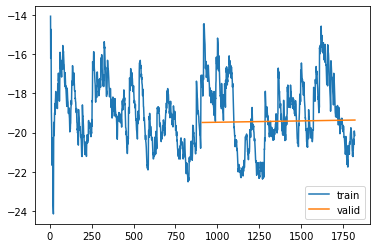

In [ ]:
learn_Aa, save_models_Aa, items_Aa = train_or_load(model_Aa, dls_Aa, 2, 2e-4, base / "All_gap_all_v1.pickle")

In [ ]:
show_results(learn_Aa, items=items_Aa, control_map=control_map)

[MeteoImpItem(i=1844, shift=-10, var_sel=['TA', 'SW_IN', 'VPD', 'PA', 'P', 'WS', 'LW_IN'], gap_len=12), MeteoImpItem(i=2247, shift=-10, var_sel=['TA', 'SW_IN', 'VPD', 'PA', 'P', 'WS', 'LW_IN'], gap_len=12), MeteoImpItem(i=2253, shift=30, var_sel=['TA', 'SW_IN', 'VPD', 'PA', 'P', 'WS', 'LW_IN'], gap_len=12), MeteoImpItem(i=1975, shift=-20, var_sel=['TA', 'SW_IN', 'VPD', 'PA', 'P', 'WS', 'LW_IN'], gap_len=12)]


alt.HConcatChart(...)

### All variables - 96 all

Model Aa (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_Aa96 = imp_dataloader(haiB, hai_eraB, var_sel = list(haiB.columns), block_len=200, gap_len=36, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model_Aa96 = model_Aa.copy()

In [ ]:
learn_Aa96, save_models_Aa96, items_Aa96 = train_or_load(model_Aa96, dls_Aa96, 2, 2e-4, base / "All_gap_all_96_v1.pickle")

epoch,train_loss,valid_loss,rmse_gap,time


ValueError: Expected parameter covariance_matrix (Tensor of shape (7, 7)) of distribution MultivariateNormal(loc: torch.Size([7]), covariance_matrix: torch.Size([7, 7])) to satisfy the constraint PositiveDefinite(), but found invalid values:
tensor([[ 0.0464,  0.0853,  0.0814, -0.0031, -0.0969, -0.0054, -0.0313],
        [ 0.0853,  0.2309,  0.1449, -0.0055, -0.1849, -0.0164, -0.0815],
        [ 0.0814,  0.1449,  0.1417, -0.0038, -0.1716, -0.0370, -0.0575],
        [-0.0031, -0.0055, -0.0038,  0.0013,  0.0101,  0.0027,  0.0033],
        [-0.0969, -0.1849, -0.1716,  0.0101,  1.0555,  0.0276,  0.0835],
        [-0.0054, -0.0164, -0.0370,  0.0027,  0.0276,  0.0684, -0.0029],
        [-0.0313, -0.0815, -0.0575,  0.0033,  0.0835, -0.0029,  0.1097]],
       dtype=torch.float64, grad_fn=<ExpandBackward0>)

In [ ]:
show_results(learn_Aa96, items=items_Aa96, control_map=control_map)

## TA - 12

In [ ]:
dls_TA = imp_dataloader(haiB, hai_eraB, var_sel = 'TA', block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_TA = model_Av.copy()

In [ ]:
learn_TA, save_models_TA, items_TA = train_or_load(model_TA, dls_TA, 2, 2e-4, base / "TA_12_v1.pickle")

In [ ]:
show_results(learn_TA, items=items_TA, control_map=control_map, hide_no_gap=True)

[MeteoImpItem(i=1895, shift=30, var_sel=['TA'], gap_len=12), MeteoImpItem(i=2186, shift=-30, var_sel=['TA'], gap_len=12), MeteoImpItem(i=2220, shift=-50, var_sel=['TA'], gap_len=12), MeteoImpItem(i=1844, shift=-50, var_sel=['TA'], gap_len=12)]


alt.HConcatChart(...)

### TA - 96

Model TA

In [ ]:
dls_TA96 = imp_dataloader(haiB, hai_eraB, var_sel = 'TA', block_len=350, gap_len=96, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_TA96 = model_TA.copy()

epoch,train_loss,valid_loss,rmse_gap,time
0,-70.275536,-74.080324,0.107727,21:53
1,-71.829675,-72.279019,0.109978,22:05


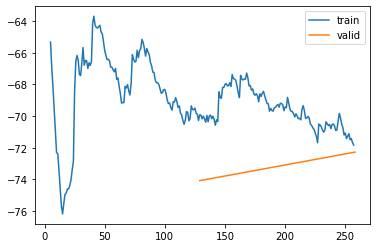

In [ ]:
learn_TA96, save_models_TA96, items_TA96 = train_or_load(model_TA96, dls_TA96, 2, 2e-4, base / "TA_96_v1.pickle")

In [ ]:
show_results(learn_TA96, items=items_TA96, control_map=control_map, hide_no_gap=True)

[MeteoImpItem(i=603, shift=-35, var_sel=['TA'], gap_len=96), MeteoImpItem(i=536, shift=-175, var_sel=['TA'], gap_len=96), MeteoImpItem(i=528, shift=105, var_sel=['TA'], gap_len=96), MeteoImpItem(i=642, shift=105, var_sel=['TA'], gap_len=96)]


alt.HConcatChart(...)

## SW_IN - 12

In [ ]:
dls_SW_IN = imp_dataloader(haiB, hai_eraB, var_sel = 'SW_IN', block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_SW_IN = model_Av.copy()

In [ ]:
learn_SW_IN, save_models_SW_IN, items_SW_IN = train_or_load(model_SW_IN, dls_SW_IN, 2, 2e-4, base / "SW_IN_12_v1.pickle")

In [ ]:
show_results(learn_SW_IN, items=items_SW_IN, control_map=control_map, hide_no_gap=True)

### SW_IN - 96

Model SW_IN (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_SW_IN96 = imp_dataloader(haiB, hai_eraB, var_sel = 'SW_IN', block_len=350, gap_len=96, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_SW_IN96 = model_SW_IN.copy()

In [ ]:
learn_SW_IN96, save_models_SW_IN96, items_SW_IN96 = train_or_load(model_SW_IN96, dls_SW_IN96, 2, 2e-4, base / "SW_IN_96_v1.pickle")

In [ ]:
show_results(learn_SW_IN96, items=items_SW_IN96, control_map=control_map, hide_no_gap=True)

## LW_IN - 12

In [ ]:
dls_LW_IN = imp_dataloader(haiB, hai_eraB, var_sel = 'LW_IN', block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_LW_IN = model_Av.copy()

In [ ]:
learn_LW_IN, save_models_LW_IN, items_LW_IN = train_or_load(model_LW_IN, dls_LW_IN, 2, 2e-4, base / "LW_IN_12_v1.pickle")

In [ ]:
show_results(learn_LW_IN, items=items_LW_IN, control_map=control_map, hide_no_gap=True)

### LW_IN - 96

Model LW_IN (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_LW_IN96 = imp_dataloader(haiB, hai_eraB, var_sel = 'LW_IN', block_len=350, gap_len=96, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_LW_IN96 = model_LW_IN.copy()

In [ ]:
learn_LW_IN96, save_models_LW_IN96, items_LW_IN96 = train_or_load(model_LW_IN96, dls_LW_IN96, 2, 2e-4, base / "LW_IN_96_v1.pickle")

In [ ]:
show_results(learn_LW_IN96, items=items_LW_IN96, control_map=control_map, hide_no_gap=True)

## No Control

### All variables - 12 varying 

Model Av_nc (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_Av_nc = imp_dataloader(haiB, hai_eraB, var_sel = gen_var_sel(list(haiB.columns)), block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model_Av_nc = model_Av.copy()
model_Av_nc.use_control = False

In [ ]:
learn_Av_nc, save_models_Av_nc, items_Av_nc = train_or_load(model_Av_nc, dls_Av_nc, 10, 5e-4, base / "All_gap_varying_12_no_control_v1.pickle")

In [ ]:
show_results(learn_Av_nc, items=items_Av_nc, control_map=control_map)

In [ ]:
InteractiveSequence(save_models_Av_nc.show_results(learn_Av_nc))()

#### All variables - 96 varying 

Model Av_nc (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_Av_nc96 = imp_dataloader(haiB, hai_eraB, var_sel = gen_var_sel(list(haiB.columns)), block_len=350, gap_len=96, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model_Av_nc96 = model_Av_nc.copy()

In [ ]:
learn_Av_nc96, save_models_Av_nc96, items_Av_nc96 = train_or_load(model_Av_nc96, dls_Av_nc96, 2, 2e-4, base / "All_gap_varying_96_no_control_v1.pickle")

In [ ]:
show_results(learn_Av_nc96, items=items_Av_nc96, control_map=control_map)

### All variables - 12 all

In [ ]:
dls_Aa_nc = imp_dataloader(haiB, hai_eraB, var_sel = list(haiB.columns), block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model_Aa_nc = model_Av_nc.copy()

In [ ]:
learn_Aa_nc, save_models_Aa_nc, items_Aa_nc = train_or_load(model_Aa_nc, dls_Aa_nc, 2, 2e-4, base / "All_gap_all_no_control_v1.pickle")

In [ ]:
show_results(learn_Aa_nc, items=items_Aa_nc, control_map=control_map)

#### All variables - 96 all

Model Aa_nc (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_Aa_nc96 = imp_dataloader(haiB, hai_eraB, var_sel = list(haiB.columns), block_len=350, gap_len=96, bs=20, control_lags=[1], n_rep=10).cpu()

In [ ]:
model_Aa_nc96 = model_Aa_nc.copy()

In [ ]:
learn_Aa_nc96, save_models_Aa_nc96, items_Aa_nc96 = train_or_load(model_Aa_nc96, dls_Aa_nc96, 2, 2e-4, base / "All_gap_all_96_no_control_v1.pickle")

In [ ]:
show_results(learn_Aa_nc96, items=items_Aa_nc96, control_map=control_map)

### TA_nc - 12

In [ ]:
dls_TA_nc = imp_dataloader(haiB, hai_eraB, var_sel = 'TA', block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_TA_nc = model_Av_nc.copy()

In [ ]:
learn_TA_nc, save_models_TA_nc, items_TA_nc = train_or_load(model_TA_nc, dls_TA_nc, 2, 2e-4, base / "TA_nc_12_no_control_v1.pickle")

In [ ]:
show_results(learn_TA_nc, items=items_TA_nc, control_map=control_map, hide_no_gap=True)

#### TA_nc - 96

Model TA_nc (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_TA_nc96 = imp_dataloader(haiB, hai_eraB, var_sel = 'TA', block_len=350, gap_len=96, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_TA_nc96 = model_TA_nc.copy()

In [ ]:
learn_TA_nc96, save_models_TA_nc96, items_TA_nc96 = train_or_load(model_TA_nc96, dls_TA_nc96, 2, 2e-4, base / "TA_nc_96_no_control_v1.pickle")

In [ ]:
show_results(learn_TA_nc96, items=items_TA_nc96, control_map=control_map, hide_no_gap=True)

### SW_IN_nc - 12

In [ ]:
dls_SW_IN_nc = imp_dataloader(haiB, hai_eraB, var_sel = 'SW_IN_nc', block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_SW_IN_nc = model_Av_nc.copy()

In [ ]:
learn_SW_IN_nc, save_models_SW_IN_nc, items_SW_IN_nc = train_or_load(model_SW_IN_nc, dls_SW_IN_nc, 2, 2e-4, base / "SW_IN_nc_12_no_control_v1.pickle")

In [ ]:
show_results(learn_SW_IN_nc, items=items_SW_IN_nc, control_map=control_map, hide_no_gap=True)

#### SW_IN_nc - 96

Model SW_IN_nc (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_SW_IN_nc96 = imp_dataloader(haiB, hai_eraB, var_sel = 'SW_IN_nc', block_len=350, gap_len=96, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_SW_IN_nc96 = model_SW_IN_nc.copy()

In [ ]:
learn_SW_IN_nc96, save_models_SW_IN_nc96, items_SW_IN_nc96 = train_or_load(model_SW_IN_nc96, dls_SW_IN_nc96, 2, 2e-4, base / "SW_IN_nc_96_no_control_v1.pickle")

In [ ]:
show_results(learn_SW_IN_nc96, items=items_SW_IN_nc96, control_map=control_map, hide_no_gap=True)

### LW_IN_nc - 12

In [ ]:
dls_LW_IN_nc = imp_dataloader(haiB, hai_eraB, var_sel = 'LW_IN', block_len=100, gap_len=12, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_LW_IN_nc = model_Av_nc.copy()

In [ ]:
learn_LW_IN_nc, save_models_LW_IN_nc, items_LW_IN_nc = train_or_load(model_LW_IN_nc, dls_LW_IN_nc, 2, 2e-4, base / "LW_IN_12_no_control_v1.pickle")

In [ ]:
show_results(learn_LW_IN_nc, items=items_LW_IN_nc, control_map=control_map, hide_no_gap=True)

#### LW_IN_nc - 96

Model LW_IN_nc (*A*ll *v*arying) all variables with a *v*aring numbers of variables  

In [ ]:
dls_LW_IN_nc96 = imp_dataloader(haiB, hai_eraB, var_sel = 'LW_IN_nc', block_len=350, gap_len=96, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
model_LW_IN_nc96 = model_LW_IN_nc.copy()

In [ ]:
learn_LW_IN_nc96, save_models_LW_IN_nc96, items_LW_IN_nc96 = train_or_load(model_LW_IN_nc96, dls_LW_IN_nc96, 2, 2e-4, base / "LW_IN_96_no_control_v1.pickle")

In [ ]:
show_results(learn_LW_IN_nc96, items=items_LW_IN_nc96, control_map=control_map, hide_no_gap=True)